In [8]:
import pandas as pd
df = pd.read_csv('Epi_Task_Data.csv')
df.head()


,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2024,1,Nairobi,0-4yrs,3.2,3658
2,2023,2,Nairobi,0-4yrs,4.5,3043
3,2024,2,Nairobi,0-4yrs,4.9,2765
4,2023,3,Nairobi,0-4yrs,4.6,6975


In [4]:
df.info()   # Summary: number of rows, columns, data types, missing values
df.describe()  # Basic stats: mean, std, min, max (for numeric columns)
df.columns   # List all column names
df.shape     # Rows and columns (rows, cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            280 non-null    int64  
 1   epi_week        280 non-null    int64  
 2   county          280 non-null    object 
 3   age_group       280 non-null    object 
 4   ili_percentage  280 non-null    float64
 5   population      280 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


(280, 6)

In [7]:
mean_ili = df.groupby(['county', 'year'])['ili_percentage'].mean().reset_index()
print(mean_ili)

      county  year  ili_percentage
0   Kakamega  2023           4.060
1   Kakamega  2024           4.540
2     Kiambu  2023           3.895
3     Kiambu  2024           3.705
4     Kisumu  2023           4.065
5     Kisumu  2024           3.725
6   Machakos  2023           3.380
7   Machakos  2024           3.975
8    Mombasa  2023           3.895
9    Mombasa  2024           3.985
10   Nairobi  2023           4.220
11   Nairobi  2024           3.990
12    Nakuru  2023           3.780
13    Nakuru  2024           4.530


In [10]:
pivot_table = mean_ili.pivot(index='county', columns='year', values='ili_percentage').round(2)
print(pivot_table)


year      2023  2024
county              
Kakamega  4.06  4.54
Kiambu    3.90  3.70
Kisumu    4.06  3.72
Machakos  3.38  3.98
Mombasa   3.90  3.99
Nairobi   4.22  3.99
Nakuru    3.78  4.53


In [11]:
mean_ili.to_html('mean_ili_table.html')


In [12]:
mean_ili.to_csv('mean_ili_table.csv', index=False)


In [46]:
import pandas as pd

# 1. Select the three counties
selected_counties = ['Nairobi', 'Kisumu', 'Kakamega', 'Kiambu', 'Machakos','Mombasa','Nakuru']
df_selected = df[df['county'].isin(selected_counties)]

# 2. Calculate estimated ili_cases
df_selected['ili_cases'] = (df_selected['ili_percentage'] / 100) * df_selected['population']

# 3. Group by county and sum ili_cases and population
summary = df_selected.groupby('county').agg({
    'ili_cases': 'sum',
    'population': 'sum'
}).reset_index()

# 4. Calculate incidence rate per 100,000
summary['incidence_rate_per_100k'] = (summary['ili_cases'] / summary['population']) * 100000

# 5. Round to nearest whole number
summary['incidence_rate_per_100k'] = summary['incidence_rate_per_100k'].round(0).astype(int)

# 6. Final clean table
final_table = summary[['county', 'incidence_rate_per_100k']]
final_table.columns = ['County', 'Incidence Rate (per 100,000)']

# 7. Display the final table
final_table.style.set_properties(**{'text-align': 'center'} )

plt.savefig('ratepr100k_image.png', dpi=300, bbox_inches='tight')



<Figure size 640x480 with 0 Axes>

F-statistic: 0.87
P-value: 0.4224


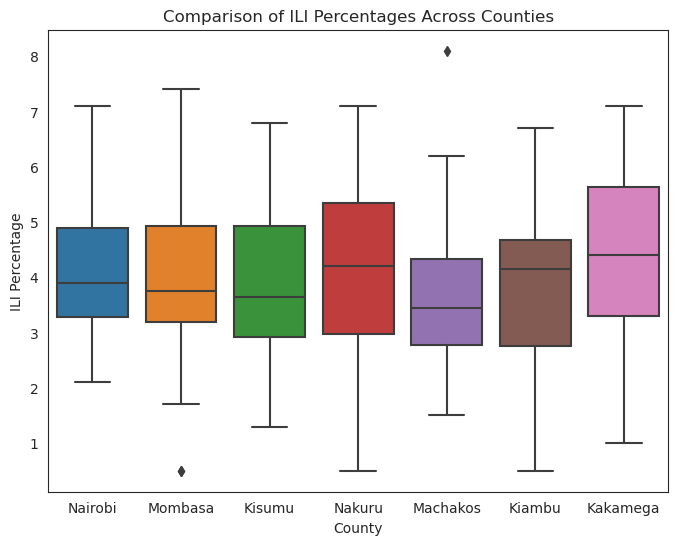

In [41]:
# Step 1: Import what you need
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Select the three counties
selected_counties = ['Nairobi', 'Kisumu', 'Kakamega', 'Kiambu','Machakos','Mombasa','Nakuru']
df_selected = df[df['county'].isin(selected_counties)]

# Step 3: Prepare ili_percentage data for each county
nairobi_ili = df_selected[df_selected['county'] == 'Nairobi']['ili_percentage']
kisumu_ili = df_selected[df_selected['county'] == 'Kisumu']['ili_percentage']
kakamega_ili = df_selected[df_selected['county'] == 'Kakamega']['ili_percentage']

# Step 4: Perform ANOVA
f_statistic, p_value = stats.f_oneway(nairobi_ili, kisumu_ili, kakamega_ili)

# Step 5: Print results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Step 6: (Optional) Visualize
plt.figure(figsize=(8,6))
sns.boxplot(x='county', y='ili_percentage', data=df_selected)
plt.title('Comparison of ILI Percentages Across Counties')
plt.xlabel('County')
plt.ylabel('ILI Percentage')
plt.savefig('rate per100k.png', dpi=300, bbox_inches='tight')

plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_170/2117712683.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


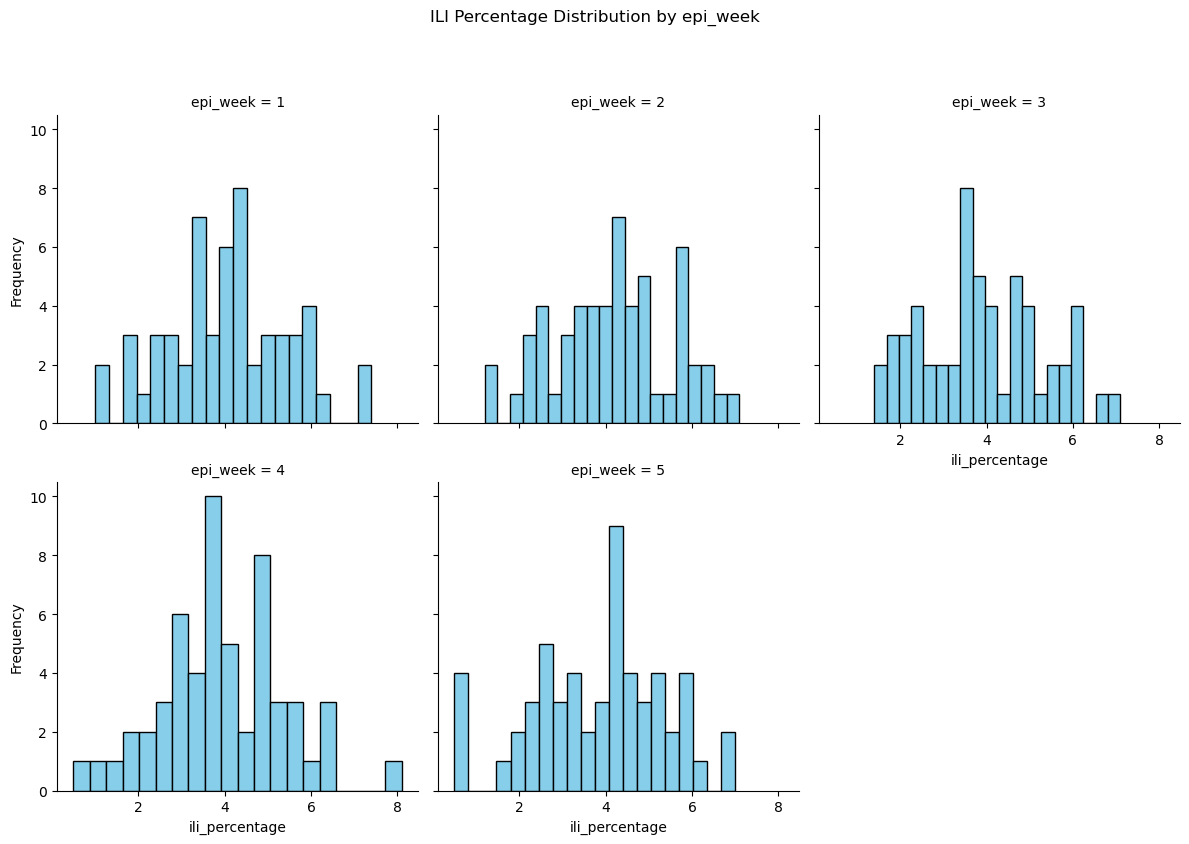

In [11]:
import seaborn as sns

epi_week = df['epi_week'].value_counts().index[:5]
df_subset = df[df['epi_week'].isin(top_weeks)]

# Create a facet grid
g = sns.FacetGrid(df_subset, col='epi_week', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(plt.hist, 'ili_percentage', bins=20, color='skyblue', edgecolor='black')

g.fig.suptitle('ILI Percentage Distribution by epi_week', y=1.05)
g.set_axis_labels('ili_percentage', 'Frequency')
plt.tight_layout()
plt.show()
